### Importing Relevant Libraries

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,f1_score, jaccard_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import os

### Data Collection

Data used for this project was obtained from kaggle datasets. The data has been modified to fit the scope of the project.

### Data Assessment

In [73]:
acc_df = pd.read_csv('UK_road_accident_data.csv')
acc_df.shape

(60000, 34)

In [74]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               60000 non-null  object 
 1   1st_Road_Class                               60000 non-null  object 
 2   1st_Road_Number                              60000 non-null  float64
 3   2nd_Road_Class                               31695 non-null  object 
 4   2nd_Road_Number                              59609 non-null  float64
 5   Accident_Severity                            60000 non-null  object 
 6   Carriageway_Hazards                          60000 non-null  object 
 7   Date                                         60000 non-null  object 
 8   Day_of_Week                                  60000 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  59954 non-null  float64
 10

There are some null entries that need to be filled or removed, data types that need to be changed and columns that need to be removed. Also, column names need to lower case for ease of typing and for proper variable naming.

In [75]:
# Checking for duplicate entries

sum(acc_df.duplicated())

0

NO DUPLICATE ENTRIES. GOOD

### Data Cleaning

##### Renaming columns

In [76]:
acc_df.columns = acc_df.columns.map(lambda col: col.lower())
acc_df.columns[:4]

Index(['accident_index', '1st_road_class', '1st_road_number',
       '2nd_road_class'],
      dtype='object')

##### Dropping Unwanted Columns 

In [77]:
cols_to_drop = ['accident_index','carriageway_hazards','date','day_of_week',
                'did_police_officer_attend_scene_of_accident','junction_control',
                'junction_detail','local_authority_(district)','local_authority_(highway)',
                'lsoa_of_accident_location','police_force','road_surface_conditions',
                'special_conditions_at_site','time','urban_or_rural_area','year','inscotland']
acc_df.drop(cols_to_drop,axis=1,inplace=True)

##### Re-viewing Remaining Columns

In [78]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   1st_road_class                           60000 non-null  object 
 1   1st_road_number                          60000 non-null  float64
 2   2nd_road_class                           31695 non-null  object 
 3   2nd_road_number                          59609 non-null  float64
 4   accident_severity                        60000 non-null  object 
 5   latitude                                 59996 non-null  float64
 6   light_conditions                         60000 non-null  object 
 7   location_easting_osgr                    59996 non-null  float64
 8   location_northing_osgr                   59996 non-null  float64
 9   longitude                                59996 non-null  float64
 10  number_of_casualties                     60000

##### Handling Null values

In [79]:
# Columns with null values
null_cols = acc_df.isnull().apply(lambda x: sum(x))
null_cols = null_cols[null_cols != 0]
null_cols

2nd_road_class                             28305
2nd_road_number                              391
latitude                                       4
location_easting_osgr                          4
location_northing_osgr                         4
longitude                                      4
pedestrian_crossing-human_control              2
pedestrian_crossing-physical_facilities        4
dtype: int64

In [80]:
# Data types of columns with null entries
index = [index for index in null_cols.index]
acc_df.filter(index, axis=1).dtypes

2nd_road_class                              object
2nd_road_number                            float64
latitude                                   float64
location_easting_osgr                      float64
location_northing_osgr                     float64
longitude                                  float64
pedestrian_crossing-human_control          float64
pedestrian_crossing-physical_facilities    float64
dtype: object

`2nd_road_class` column with 5075 missing values and `2nd_road_number` with 391 missing values are
 too vulnerable to be used, hence we'd drop them.
The other columns can be filled with the mean of the rest of the values

In [81]:
acc_df.drop(['2nd_road_class','2nd_road_number'],axis=1,inplace=True)

In [82]:
acc_df.fillna(0,inplace=True)

In [83]:
sum(acc_df.isnull().apply(lambda x: sum(x)))

0

Null values filled with 0

##### Converting data types of columns with `object dtype` to numeric data types

In [85]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   1st_road_class                           60000 non-null  object 
 1   1st_road_number                          60000 non-null  float64
 2   accident_severity                        60000 non-null  object 
 3   latitude                                 60000 non-null  float64
 4   light_conditions                         60000 non-null  object 
 5   location_easting_osgr                    60000 non-null  float64
 6   location_northing_osgr                   60000 non-null  float64
 7   longitude                                60000 non-null  float64
 8   number_of_casualties                     60000 non-null  int64  
 9   number_of_vehicles                       60000 non-null  int64  
 10  pedestrian_crossing-human_control        60000

In [86]:
def to_codes(df,cols):
    for col in cols:
        df[col+'_coded'] = df[col].astype('category').cat.codes

In [87]:
cols_coded = ['1st_road_class', 'accident_severity','light_conditions', 
              'pedestrian_crossing-physical_facilities', 'road_type', 'weather_conditions']
to_codes(acc_df,cols_coded)

In [88]:
acc_df.iloc[:,-6:].head(2)


,1st_road_class_coded,accident_severity_coded,light_conditions_coded,pedestrian_crossing-physical_facilities_coded,road_type_coded,weather_conditions_coded
0,2,2,1,3,0,2
1,3,2,1,0,3,2


In [89]:
# Dropping columns
acc_df.drop(cols_coded,axis=1,inplace=True)

In [90]:
print(acc_df.shape)
acc_df.head()

(60000, 15)


,1st_road_number,latitude,location_easting_osgr,location_northing_osgr,longitude,number_of_casualties,number_of_vehicles,pedestrian_crossing-human_control,speed_limit,1st_road_class_coded,accident_severity_coded,light_conditions_coded,pedestrian_crossing-physical_facilities_coded,road_type_coded,weather_conditions_coded
0,450.0,51.520075,524170.0,181650.0,-0.211708,1,1,0.0,30.0,2,2,1,3,0,2
1,0.0,51.525301,524520.0,182240.0,-0.206458,1,2,0.0,30.0,3,2,1,0,3,2
2,3220.0,51.482442,526900.0,177530.0,-0.173862,1,1,0.0,30.0,0,2,4,0,3,2
3,0.0,51.495752,528060.0,179040.0,-0.156618,1,1,0.0,30.0,5,2,0,0,3,2
4,0.0,51.515540,524770.0,181160.0,-0.203238,1,2,0.0,30.0,5,2,4,0,3,6


### Utilities

In [91]:
def transform_data(X,y,Xts=None,yts=None):
    X = X.to_numpy(copy=True)
    y = y.to_numpy(copy=True)
    y_data = y.reshape(y.shape[0], -1)
    if Xts is not None:
        Xts = Xts.to_numpy(copy=True)
    if yts is not None:
        yts = yts.to_numpy(copy=True)
        y_test = yts.reshape(yts.shape[0], -1)
    if (Xts is not None) and (yts is not None):
        return X, y_data, X_test, y_test
    return X, y_data


def model_acc_loss_plot(model_history):
    '''Plots model accuracy and loss on the train and validation sets'''
    plt.plot(model_history.history['categorical_accuracy'])
    plt.plot(model_history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upper left')
    plt.show()
    
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upper left')
    plt.show()

def plot_cm(model, x_test, y_test):
    '''Returns a plot of the confusion matrix of the model'''
    Y_pred = model.predict(x_test)
    y_pred = np.argmax(Y_pred,axis=1)
    y_test = np.argmax(y_test,axis=1)
    print('confusion matrix')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['slight','serious','fatal'])
    disp.plot()
    plt.show()

def cal_f1_score(model, x_test,y_test,average=True):
    Y_pred = model.predict(x_test)
    y_pred = np.argmax(Y_pred,axis=1)
    y_test = np.argmax(y_test,axis=1)
    if average==True:
        return f1_score(y_test,y_pred,average='weighted')
    return f1_score(y_test,y_pred)

def jac_score(model, x_test,y_test,average=True):
    Y_pred = model.predict(x_test)
    y_pred = np.argmax(Y_pred,axis=1)
    y_test = np.argmax(y_test,axis=1)
    if average==True:
        return jaccard_score(y_test,y_pred,average='weighted')
    return jaccard_score(y_test,y_pred)

def hotencode(y):
    onehot_encoder = OneHotEncoder(sparse=False)
    if y.ndim != 2:
        y = y.reshape(-1, 1)
    return onehot_encoder.fit_transform(y)

### Data Preparation

##### Splitting Into Train and Test Set

In [94]:
X = acc_df.drop('accident_severity_coded',axis=1)
y = acc_df['accident_severity_coded'].copy()
X.shape, y.shape

((60000, 14), (60000,))

In [95]:
y.value_counts()

2    20000
1    20000
0    20000
Name: accident_severity_coded, dtype: int64

In [96]:
X_train, X_left, y_train, y_left = train_test_split(X,y,train_size=0.8,random_state=1)

X_valid, X_test, y_valid, y_test = train_test_split(X_left, y_left, test_size=0.5,random_state=1)

print(f'X train {X_train.shape}, X validation {X_valid.shape}, X test set {X_test.shape}')

print(f'y train {y_train.shape}, y validation {y_valid.shape}, y test set {y_test.shape}')

X train (48000, 14), X validation (6000, 14), X test set (6000, 14)
y train (48000,), y validation (6000,), y test set (6000,)


In [97]:
X_train_tr, y_train_tr, X_test_tr, y_test_tr = transform_data(X_train, y_train, X_test, y_test)
X_valid_tr, y_valid_tr = transform_data(X_valid, y_valid)

y_train_enc = hotencode(y_train_tr)
y_valid_enc = hotencode(y_valid_tr)
y_test_enc  = hotencode(y_test_tr)
print(f'X_train_tr --> {X_train_tr.shape}, y_test_enc --> {y_test_enc.shape}')

X_train_tr --> (48000, 14), y_test_enc --> (6000, 3)


### Modeling

In [104]:
model1 = tf.keras.Sequential()

input_shape = (X_train_tr.shape[1],)
hidden_layer1 = tf.keras.layers.Dense(units=524, activation='relu', input_shape=input_shape)
hidden_layer2 = tf.keras.layers.Dense(units=64, activation='relu')
layer_ouput = tf.keras.layers.Dense(3, activation='sigmoid')

model1.add(hidden_layer1)
model1.add(hidden_layer2)
model1.add(layer_ouput)
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 524)               7860      
                                                                 
 dense_13 (Dense)            (None, 64)                33600     
                                                                 
 dense_14 (Dense)            (None, 3)                 195       
                                                                 
Total params: 41,655
Trainable params: 41,655
Non-trainable params: 0
_________________________________________________________________


In [105]:
model1.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['sparse_categorical_accuracy']
)

history = model1.fit(
          x=X_train_tr,
          y=y_train_tr,
          epochs=100,
          validation_data= (X_valid_tr,y_valid_tr)
          
)

Epoch 1/100
1500/1500 [==============================] - 8s 5ms/step - loss: 1229.9528 - sparse_categorical_accuracy: 0.5295 - val_loss: 1326.8907 - val_sparse_categorical_accuracy: 0.6003
Epoch 2/100
1500/1500 [==============================] - 7s 5ms/step - loss: 499.1550 - sparse_categorical_accuracy: 0.5463 - val_loss: 637.4537 - val_sparse_categorical_accuracy: 0.6043
Epoch 3/100
1500/1500 [==============================] - 7s 5ms/step - loss: 235.9833 - sparse_categorical_accuracy: 0.5477 - val_loss: 71.2896 - val_sparse_categorical_accuracy: 0.6370
Epoch 4/100
1500/1500 [==============================] - 7s 5ms/step - loss: 140.4591 - sparse_categorical_accuracy: 0.5489 - val_loss: 151.1571 - val_sparse_categorical_accuracy: 0.6185
Epoch 5/100
1500/1500 [==============================] - 7s 5ms/step - loss: 57.2671 - sparse_categorical_accuracy: 0.5244 - val_loss: 1.0470 - val_sparse_categorical_accuracy: 0.3263
Epoch 6/100
1500/1500 [==============================] - 7s 5ms/ste

KeyboardInterrupt: 

In [101]:
cal_f1_score(model1,X_test_tr,y_test_tr)

188/188 [==============================] - 1s 5ms/step


0.00033327778703549406

188/188 [==============================] - 1s 3ms/step
confusion matrix


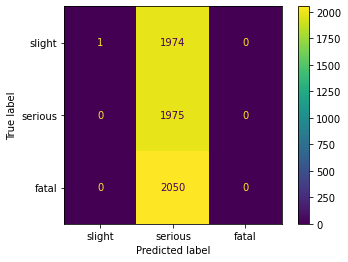

In [102]:
plot_cm(model1,X_test_tr,y_test_enc)


In [33]:
np.argmax(y_train_enc,axis=1)

array([1, 2, 2, ..., 2, 1, 2], dtype=int64)

In [103]:
model1.predict(X_test_tr)[100:120]

188/188 [==============================] - 1s 3ms/step


array([[0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835],
       [0.3301101 , 0.3381316 , 0.33175835]], dtype=float32)